In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
#Load in the data set
FifaDB = pd.read_csv("NewFifa.csv")
FifaDB.set_index('Name', inplace=True)

In [3]:
#Remove Goalkeepers
FifaDB = FifaDB[FifaDB.Position != 5]
FifaDB.head(10)

,Overall,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves,Work Rate,Body Type,Position,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,94,94,110000000,565000,1,4.0,4.0,8,4,21,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
Cristiano Ronaldo,94,94,77000000,405000,0,4.0,5.0,1,1,26,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
Neymar Jr,92,93,118000000,290000,0,5.0,5.0,2,5,14,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
K. De Bruyne,91,92,102000000,355000,0,5.0,4.0,0,6,19,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
E. Hazard,91,91,93000000,340000,0,4.0,4.0,2,6,11,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
L. Modrić,91,91,67000000,420000,0,4.0,4.0,0,3,19,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
L. Suárez,91,91,80000000,455000,0,4.0,3.0,2,6,23,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
Sergio Ramos,91,91,51000000,380000,0,3.0,3.0,2,6,18,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
R. Lewandowski,90,90,77000000,205000,0,4.0,4.0,2,6,26,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0


Position          1.000000
Finishing         0.429067
Interceptions     0.449819
Marking           0.435244
StandingTackle    0.486508
SlidingTackle     0.484604
Name: Position, dtype: float64

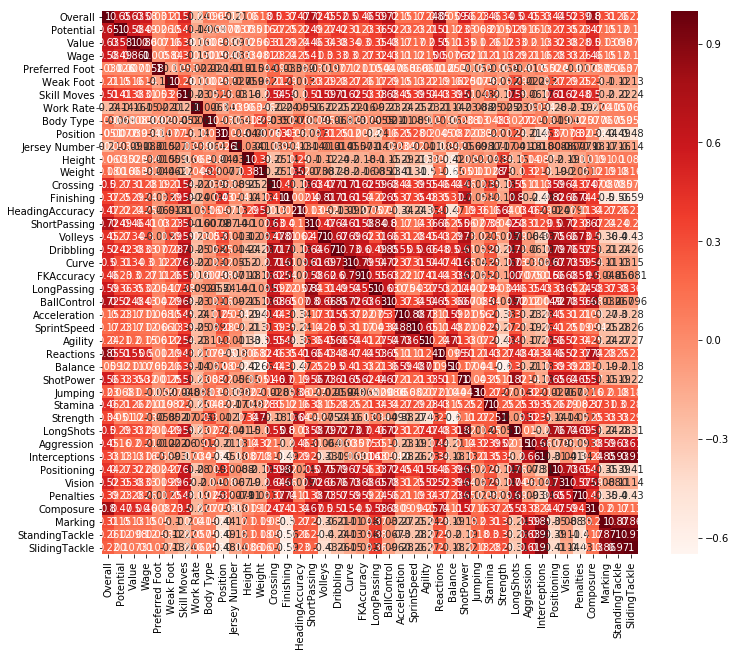

In [4]:
#Checking correlations for certain positions
plt.figure(figsize=(12,10))
cor = FifaDB.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#Correlation with output variable
cor_target = abs(cor["Position"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

In [5]:
FifaDB.columns

Index(['Overall', 'Potential', 'Value', 'Wage', 'Preferred Foot', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

In [6]:
FifaSkills = FifaDB[['Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']]

In [7]:
FifaSkills.div(FifaDB.Overall, axis=0)

,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Name,,,,,,,,,,,,,,,,,,,,,
L. Messi,1.010638,0.744681,0.957447,0.914894,1.031915,0.989362,1.000000,0.925532,1.021277,0.968085,...,1.000000,0.510638,0.234043,1.000000,1.000000,0.797872,1.021277,0.351064,0.297872,0.276596
Cristiano Ronaldo,1.000000,0.946809,0.861702,0.925532,0.936170,0.861702,0.808511,0.819149,1.000000,0.946809,...,0.989362,0.670213,0.308511,1.010638,0.872340,0.904255,1.010638,0.297872,0.329787,0.244681
Neymar Jr,0.945652,0.673913,0.913043,0.913043,1.043478,0.956522,0.945652,0.847826,1.032609,1.021739,...,0.891304,0.608696,0.391304,0.967391,0.945652,0.880435,1.021739,0.293478,0.260870,0.358696
K. De Bruyne,0.901099,0.604396,1.010989,0.901099,0.945055,0.934066,0.912088,1.000000,1.000000,0.857143,...,1.000000,0.835165,0.670330,0.956044,1.032967,0.868132,0.967033,0.747253,0.637363,0.560440
E. Hazard,0.923077,0.670330,0.978022,0.879121,1.043956,0.912088,0.868132,0.912088,1.032967,1.032967,...,0.879121,0.593407,0.450549,0.956044,0.978022,0.945055,1.000000,0.373626,0.296703,0.241758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
J. Lundstram,0.808511,0.851064,1.042553,0.531915,0.893617,0.638298,0.723404,0.957447,0.914894,1.148936,...,0.808511,0.978723,0.978723,0.829787,1.106383,0.914894,0.957447,0.851064,1.021277,1.000000
N. Christoffersson,1.106383,1.106383,0.914894,0.765957,0.829787,0.680851,0.425532,0.531915,0.851064,0.872340,...,0.893617,1.000000,0.340426,0.978723,0.702128,0.914894,0.893617,0.468085,0.319149,0.404255
B. Worman,0.851064,0.978723,0.808511,0.808511,0.957447,0.808511,0.574468,0.595745,0.936170,1.489362,...,0.957447,0.680851,0.319149,1.021277,0.914894,1.170213,0.872340,0.680851,0.276596,0.234043
